In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df_transactions = pd.read_json('../data/transactions.json', lines=True)
df_users = pd.read_csv('../data/users.csv')
df_merchants = pd.read_csv('../data/merchants.csv')

In [19]:
df_merged = pd.merge(df_transactions, df_users, on='user_id', how='left')
df_merged = pd.merge(df_merged, df_merchants, on='merchant_id', how='left')
df = df_merged

In [20]:
df['latitude'] = df['location'].apply(lambda x: x['lat'])
df['longitude'] = df['location'].apply(lambda x: x['long'])
df.drop(columns=['location'], inplace=True)

In [21]:
df.columns

Index(['transaction_id', 'timestamp', 'user_id', 'merchant_id', 'amount',
       'channel', 'currency', 'device', 'payment_method', 'is_international',
       'session_length_seconds', 'is_first_time_merchant', 'is_fraud', 'age',
       'sex', 'education', 'primary_source_of_income',
       'sum_of_monthly_installments', 'sum_of_monthly_expenses', 'country_x',
       'signup_date', 'risk_score', 'category', 'country_y', 'trust_score',
       'number_of_alerts_last_6_months', 'avg_transaction_amount',
       'account_age_months', 'has_fraud_history', 'latitude', 'longitude'],
      dtype='object')

<BarContainer object of 2 artists>

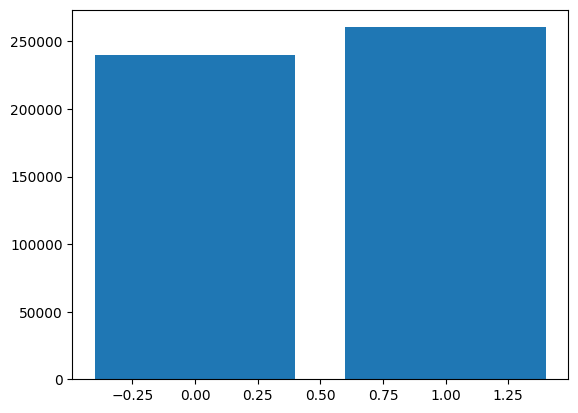

In [22]:
tmp = df["has_fraud_history"].value_counts()
tmp

plt.bar(tmp.index, tmp.values)

(array([286452., 122789.,  54122.,  24758.,   7954.,   1483.,   1909.,
             0.,      0.,    533.]),
 array([1.20000e-01, 7.10120e+01, 1.41904e+02, 2.12796e+02, 2.83688e+02,
        3.54580e+02, 4.25472e+02, 4.96364e+02, 5.67256e+02, 6.38148e+02,
        7.09040e+02]),
 <BarContainer object of 10 artists>)

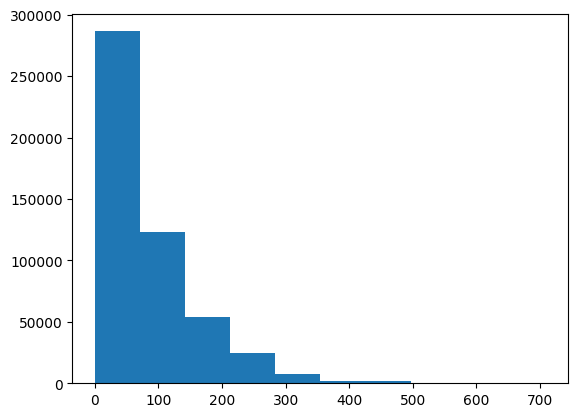

In [23]:
plt.hist(df["avg_transaction_amount"])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   transaction_id                  500000 non-null  object        
 1   timestamp                       500000 non-null  datetime64[ns]
 2   user_id                         500000 non-null  object        
 3   merchant_id                     500000 non-null  object        
 4   amount                          500000 non-null  float64       
 5   channel                         500000 non-null  object        
 6   currency                        500000 non-null  object        
 7   device                          500000 non-null  object        
 8   payment_method                  500000 non-null  object        
 9   is_international                500000 non-null  int64         
 10  session_length_seconds          500000 non-null  int64  

In [25]:
df2 = df

In [28]:
categorical_cols = [
    'channel', 'currency', 'device', 'payment_method', 'category',
    'country_x', 'country_y', 'sex', 'education', 'primary_source_of_income'
]

binary_cols = [
    'is_international', 'is_first_time_merchant', 'has_fraud_history'
]

numerical_cols = [
    'amount', 'session_length_seconds', 'age', 'risk_score', 'trust_score',
    'number_of_alerts_last_6_months', 'avg_transaction_amount',
    'account_age_months', 'sum_of_monthly_expenses', 'sum_of_monthly_installments'
]

In [31]:
dummies = pd.get_dummies(df2[categorical_cols], drop_first=True).astype(int)

In [33]:
df2 = df2.drop(columns=categorical_cols)
df2 = pd.concat([df2, dummies], axis=1)
df2

,transaction_id,timestamp,user_id,merchant_id,amount,is_international,session_length_seconds,is_first_time_merchant,is_fraud,age,...,sex_Male,sex_Other,education_High School,education_Master,education_PhD,primary_source_of_income_Employment,primary_source_of_income_Retirement,primary_source_of_income_Savings,primary_source_of_income_Student Aid,primary_source_of_income_Unemployment
0,TX000000,2022-06-17 23:28:00,U14804,M0314,130.03,1,145,0,0,23,...,0,0,0,0,0,0,0,1,0,0
1,TX000001,2022-01-04 15:39:00,U16634,M0675,132.00,1,32,1,0,53,...,0,0,0,0,1,0,0,0,0,0
2,TX000002,2022-09-09 21:58:00,U18005,M0479,8.65,1,604,1,0,58,...,0,0,0,0,0,0,0,0,0,0
3,TX000003,2023-11-20 06:40:00,U13690,M0538,19.82,0,1031,1,0,59,...,1,0,0,1,0,1,0,0,0,0
4,TX000004,2022-04-28 08:08:00,U04642,M0128,101.92,1,330,0,0,28,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,TX499995,2022-04-19 18:12:00,U00062,M0079,11.53,1,916,1,0,50,...,1,0,0,0,0,1,0,0,0,0
499996,TX499996,2023-06-02 06:59:00,U17320,M0760,78.01,1,527,0,0,35,...,0,0,1,0,0,1,0,0,0,0
499997,TX499997,2022-08-06 13:14:00,U07750,M0215,77.65,1,351,0,0,37,...,0,0,0,0,0,0,0,1,0,0
499998,TX499998,2023-03-20 22:00:00,U14492,M0848,221.38,1,887,0,0,22,...,1,0,1,0,0,0,0,0,1,0


In [ ]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import seaborn as sns

geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf_points = gpd.GeoDataFrame(df_transactions.copy(), geometry=geometry, crs="EPSG:4326")

world = gpd.read_file("https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip")
oceans = gpd.read_file("https://naciscdn.org/naturalearth/110m/physical/ne_110m_ocean.zip")

gdf_country = gpd.sjoin(gdf_points, world[['geometry', 'NAME']], how='left', predicate='within')
gdf_country.rename(columns={'NAME': 'country'}, inplace=True)


gdf_na = gdf_country[gdf_country['country'].isna()].copy()

# So the joins work
gdf_na = gdf_na.drop(columns=[col for col in ['index_right'] if col in gdf_na.columns])
oceans = oceans.drop(columns=[col for col in ['index_right'] if col in oceans.columns])


# gdf_ocean = gpd.sjoin(gdf_na, oceans[['geometry']], how='left', predicate='within')


# gdf_country.loc[gdf_ocean.index, 'country'] = 'Ocean'


# grouped = gdf_country.groupby(['country', 'is_fraud']).size().reset_index(name='count')


# grouped['percent'] = grouped.groupby('country')['count'].transform(lambda x: 100 * x / x.sum())


# country_order = gdf_country['country'].value_counts().index.tolist()


# plt.figure(figsize=(16, 10))
# sns.barplot(data=grouped, y='country', x='percent', hue='is_fraud', palette='Set2', order=country_order)
# plt.title('Percentage of Fraudulent and Legit Transactions by Country/Ocean')
# plt.xlabel('Percentage of Transactions')
# plt.ylabel('Country / Ocean')
# plt.legend(title='Is Fraud')
# plt.tight_layout()
# plt.show()

In [37]:
df2[df2["trust_score"] == 1].sort_values(by="is_fraud")

,transaction_id,timestamp,user_id,merchant_id,amount,is_international,session_length_seconds,is_first_time_merchant,is_fraud,age,...,sex_Male,sex_Other,education_High School,education_Master,education_PhD,primary_source_of_income_Employment,primary_source_of_income_Retirement,primary_source_of_income_Savings,primary_source_of_income_Student Aid,primary_source_of_income_Unemployment
499968,TX499968,2023-05-23 20:36:00,U04035,M0904,1.08,1,344,0,0,30,...,0,0,0,1,0,0,0,0,0,0
499182,TX499182,2022-01-22 12:38:00,U19081,M0487,71.27,1,804,0,0,73,...,0,0,1,0,0,1,0,0,0,0
499195,TX499195,2022-09-03 19:08:00,U03238,M0444,84.47,1,553,0,0,74,...,1,0,1,0,0,0,1,0,0,0
499245,TX499245,2023-07-09 15:03:00,U03637,M0989,2.03,1,1191,0,0,67,...,0,1,1,0,0,0,0,0,1,0
499268,TX499268,2023-07-28 22:44:00,U06297,M0648,62.11,1,597,0,0,33,...,1,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454014,TX454014,2023-01-02 00:12:00,U07358,M0222,63.36,1,222,1,1,20,...,1,0,0,0,1,0,0,0,1,0
427937,TX427937,2022-07-29 01:49:00,U09573,M0989,42.21,1,631,0,1,72,...,0,0,0,0,1,0,0,0,0,0
351041,TX351041,2023-03-20 08:32:00,U09574,M0075,5.27,1,1063,0,1,28,...,0,1,0,1,0,0,0,0,1,0
371352,TX371352,2023-04-16 10:28:00,U03466,M0443,10.89,1,231,1,1,43,...,0,1,0,1,0,1,0,0,0,0


In [43]:
df3 = df2[df2["is_fraud"] == 1].sort_values(by="trust_score")
df3["trust_score"]

299907    0.0
45162     0.0
467504    0.0
409659    0.0
414938    0.0
         ... 
434823    1.0
224916    1.0
434607    1.0
55398     1.0
435350    1.0
Name: trust_score, Length: 42411, dtype: float64

In [41]:
df4 = df2[df2["is_fraud"] == 1].sort_values(by="risk_score")
df4["risk_score"]

167024    0.0
210988    0.0
426276    0.0
207446    0.0
82029     0.0
         ... 
430165    1.0
372258    1.0
51133     1.0
8734      1.0
355708    1.0
Name: risk_score, Length: 42411, dtype: float64

In [46]:
df["currency"].unique()

array(['EUR'], dtype=object)

In [9]:
df[df["risk_score"]>0.99]

,transaction_id,timestamp,user_id,merchant_id,amount,channel,currency,device,payment_method,is_international,...,risk_score,category,country_y,trust_score,number_of_alerts_last_6_months,avg_transaction_amount,account_age_months,has_fraud_history,latitude,longitude
546,TX000546,2023-01-08 08:32:00,U12786,M0805,6.37,in-store,EUR,Web,credit_card,1,...,1.000000,electronics,Spain,0.699062,0,24.56,37,1,52.448172,37.030717
2040,TX002040,2023-03-31 03:55:00,U12786,M0487,326.79,online,EUR,iOS,credit_card,1,...,1.000000,travel,Italy,1.000000,3,25.54,14,1,64.201573,-6.659911
3403,TX003403,2023-06-12 07:18:00,U05143,M0262,66.43,online,EUR,Web,bank_transfer,1,...,1.000000,gaming,Czech Republic,0.890453,4,220.18,36,1,51.077894,14.309043
8702,TX008702,2022-03-24 05:11:00,U14919,M0874,42.39,online,EUR,iOS,mobile_payment,1,...,1.000000,gaming,Belgium,0.660602,3,68.86,10,1,37.558875,-4.920919
8734,TX008734,2023-06-28 07:55:00,U05143,M0080,11.81,online,EUR,Android,debit_card,1,...,1.000000,clothing,Finland,0.376415,1,51.49,92,0,55.015899,-9.498523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494160,TX494160,2023-04-15 02:55:00,U06411,M0791,6.88,online,EUR,Android,bank_transfer,1,...,0.994508,restaurants,Poland,0.700118,1,13.90,73,1,41.369788,5.352124
495840,TX495840,2022-05-25 10:06:00,U17019,M0403,63.11,mobile,EUR,Android,credit_card,1,...,0.995262,restaurants,Netherlands,0.662965,5,20.74,50,0,39.311348,29.552425
495993,TX495993,2023-11-03 17:36:00,U03789,M0253,81.39,mobile,EUR,Android,debit_card,1,...,0.993164,clothing,Netherlands,0.591699,2,34.09,43,0,66.730347,17.455788
498662,TX498662,2023-02-14 14:00:00,U00741,M0156,12.14,online,EUR,Android,mobile_payment,1,...,1.000000,gaming,Czech Republic,0.817576,5,70.51,109,0,66.766087,-1.244642


(array([  1699.,   8749.,  33866.,  82016., 122890., 122111.,  81502.,
         35657.,   9605.,   1905.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

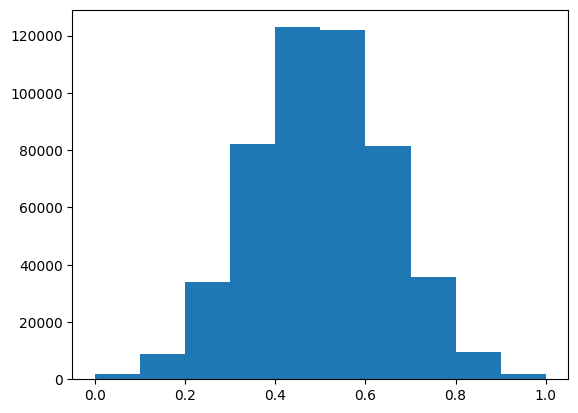

In [10]:
plt.hist(df["risk_score"])

In [11]:
df[df["user_id"] == "U00741"]

,transaction_id,timestamp,user_id,merchant_id,amount,channel,currency,device,payment_method,is_international,...,risk_score,category,country_y,trust_score,number_of_alerts_last_6_months,avg_transaction_amount,account_age_months,has_fraud_history,latitude,longitude
61585,TX061585,2023-09-20 13:50:00,U00741,M0014,145.43,in-store,EUR,Android,credit_card,1,...,1.0,travel,Portugal,0.801802,1,70.31,43,1,53.316997,0.590333
81627,TX081627,2022-08-02 09:22:00,U00741,M0063,9.44,mobile,EUR,iOS,credit_card,1,...,1.0,restaurants,Germany,0.927067,2,44.66,64,0,42.388384,38.328245
119609,TX119609,2022-03-17 08:36:00,U00741,M0149,53.55,online,EUR,Web,mobile_payment,1,...,1.0,gaming,France,0.733931,2,26.34,21,0,52.176853,-1.912018
127817,TX127817,2022-09-28 10:37:00,U00741,M0442,15.21,mobile,EUR,Android,mobile_payment,1,...,1.0,grocery,France,0.573831,0,170.37,99,1,55.182693,-7.069286
163096,TX163096,2022-06-04 07:17:00,U00741,M0346,24.70,online,EUR,Android,bank_transfer,1,...,1.0,gaming,Finland,0.784263,3,232.41,47,1,52.289667,1.996699
177513,TX177513,2023-06-20 16:44:00,U00741,M0407,2.45,online,EUR,iOS,debit_card,1,...,1.0,travel,Portugal,0.446476,5,47.30,63,0,63.598166,25.685535
224235,TX224235,2023-11-07 05:15:00,U00741,M0865,26.95,in-store,EUR,iOS,debit_card,1,...,1.0,gaming,Germany,0.562570,4,73.07,67,0,52.021487,35.159234
227681,TX227681,2023-09-28 18:06:00,U00741,M0394,19.63,in-store,EUR,Web,debit_card,1,...,1.0,education,Portugal,0.697761,2,155.35,39,1,68.951451,-0.300000
241528,TX241528,2022-09-14 13:21:00,U00741,M0811,17.63,in-store,EUR,Web,credit_card,1,...,1.0,electronics,Spain,0.702852,0,2.80,13,1,65.698885,33.020181
304923,TX304923,2022-04-28 11:17:00,U00741,M0088,4.84,in-store,EUR,Web,debit_card,0,...,1.0,electronics,Denmark,0.496026,3,195.97,93,1,52.250201,3.499207


In [12]:
# transactions[transactions["user_id"] == "U09512"].sort_values(by="timestamp")

NameError: name 'transactions' is not defined

In [ ]:
# type(transactions.location[0])

dict

In [ ]:
# transactions.location[0]["lat"]

40.057938

<BarContainer object of 2 artists>

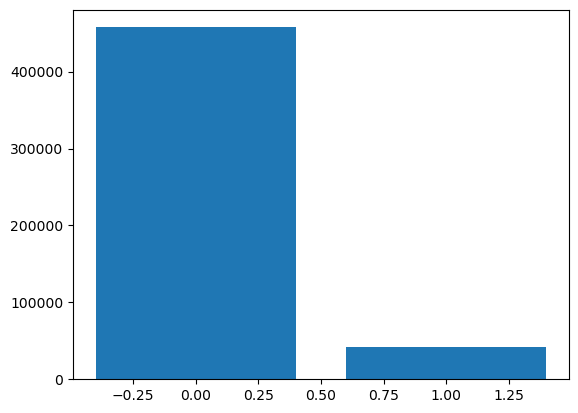

In [ ]:
# tmp = transactions["is_fraud"].value_counts()
# tmp

# plt.bar(tmp.index, tmp.values)



In [ ]:
# data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   transaction_id          500000 non-null  object        
 1   timestamp               500000 non-null  datetime64[ns]
 2   user_id                 500000 non-null  object        
 3   merchant_id             500000 non-null  object        
 4   amount                  500000 non-null  float64       
 5   channel                 500000 non-null  object        
 6   currency                500000 non-null  object        
 7   device                  500000 non-null  object        
 8   location                500000 non-null  object        
 9   payment_method          500000 non-null  object        
 10  is_international        500000 non-null  int64         
 11  session_length_seconds  500000 non-null  int64         
 12  is_first_time_merchant  500000